In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def vector_min(x, y):
    return .5*(x+y -np.abs(x-y))

def vector_max(x, y):
    return .5*(x+y +np.abs(x-y))

def get_interp_weights_1d(xo, xn):
    ''''''
    num_elements = len(xo) -1
    w = np.zeros((num_elements, num_elements))
    xln = xn[:-1] #new LH nodes
    xrn = xn[1:]  #new RH nodes
    for i in range(num_elements):
        xlo, xro = xo[i], xo[i+1] #old LH, RH nodes
        check = (xrn>xlo) * (xln<xro)
        w[check,i] = (vector_min(xrn[check], xro)
                      - vector_max(xln[check], xlo)
                     )/(xro - xlo)
    return w

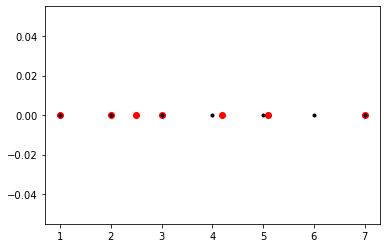

[[1.         0.         0.         0.         0.         0.        ]
 [0.         1.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.83333333 0.         0.        ]
 [0.         0.         0.         0.16666667 0.88888889 0.        ]
 [0.         0.         0.         0.         0.11111111 0.47368421]
 [0.         0.         0.         0.         0.         0.52631579]]
[1. 1. 1. 1. 1. 1.]
[[1.         0.         0.         0.         0.         0.        ]
 [0.         1.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.83333333 0.         0.        ]
 [0.         0.         0.         0.16666667 0.88888889 0.        ]
 [0.         0.         0.         0.         0.11111111 0.47368421]
 [0.         0.         0.         0.         0.         0.52631579]]
[1. 1. 1. 1. 1. 1.]


In [47]:
def test_get_interp_weights_1d():
    xn = np.array([1,2,3,4,5,6,7])
    xo = np.array([1,2,2.5,3,4.2,5.1,7])
    plt.plot(xo,0*xo,'or')
    plt.plot(xn, 0*xn, '.k')
    plt.show()
    
    # calc weights
    w_calc = get_interp_weights_1d(xo, xn)

    #true weights:
    #rows are for new elements
    #columns are weights for old elements
    w_true = np.zeros((6,6))
    w_true[0,0] = 1
    w_true[1,1:3]=1
    w_true[2,3]=1/1.2
    w_true[3,3]=.2/1.2
    w_true[3,4]=.8/.9
    w_true[4,4]=.1/.9
    w_true[4,5]=.9/1.9
    w_true[5,5]=1/1.9
    for w in [w_calc, w_true]:
        print(w)
        print(np.sum(w, axis=0))# columns should sum to 1
        
test_get_interp_weights_1d()